In [1]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
#load dataset after preprocessing
dsa = pd.read_csv('data_ap_s_a_p.csv')

In [8]:
kategor = 0
data_kategori = dsa.loc[dsa['Pelayanan'] == kategor]

d = data_kategori.head(100)

kategori = 1
data_i = dsa.loc[dsa['Pelayanan'] == kategori]

data_gabungan = pd.concat([d, data_i])

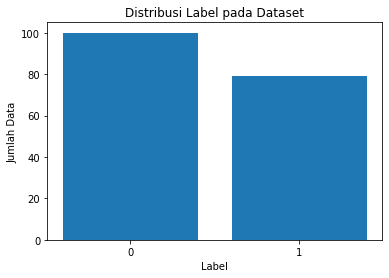

In [10]:
count_label = data_gabungan['Pelayanan'].value_counts()

# Membuat diagram batang
plt.bar(count_label.index, count_label.values)
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label pada Dataset')
plt.show()

Epoch 1/100
7/7 [==============================] - 6s 226ms/step - loss: 0.6611 - accuracy: 0.7935 - val_loss: 0.5852 - val_accuracy: 0.8981
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 0.4590 - accuracy: 0.8794 - val_loss: 0.3018 - val_accuracy: 0.8981
Epoch 3/100
7/7 [==============================] - 0s 29ms/step - loss: 0.3879 - accuracy: 0.8794 - val_loss: 0.3102 - val_accuracy: 0.8981
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 0.3505 - accuracy: 0.8794 - val_loss: 0.3103 - val_accuracy: 0.8981
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.3448 - accuracy: 0.8794 - val_loss: 0.3005 - val_accuracy: 0.8981
Epoch 6/100
7/7 [==============================] - 0s 33ms/step - loss: 0.3174 - accuracy: 0.8794 - val_loss: 0.2794 - val_accuracy: 0.8981
Epoch 7/100
7/7 [==============================] - 0s 31ms/step - loss: 0.3083 - accuracy: 0.8794 - val_loss: 0.2702 - val_accuracy: 0.8981
Epoch 8/100
7/7 [==

Epoch 59/100
7/7 [==============================] - 0s 39ms/step - loss: 6.8771e-04 - accuracy: 1.0000 - val_loss: 0.5564 - val_accuracy: 0.8981
Epoch 60/100
7/7 [==============================] - 0s 34ms/step - loss: 6.2357e-04 - accuracy: 1.0000 - val_loss: 0.5599 - val_accuracy: 0.8981
Epoch 61/100
7/7 [==============================] - 0s 34ms/step - loss: 5.6830e-04 - accuracy: 1.0000 - val_loss: 0.5633 - val_accuracy: 0.8981
Epoch 62/100
7/7 [==============================] - 0s 34ms/step - loss: 5.9070e-04 - accuracy: 1.0000 - val_loss: 0.5665 - val_accuracy: 0.8981
Epoch 63/100
7/7 [==============================] - 0s 34ms/step - loss: 5.0863e-04 - accuracy: 1.0000 - val_loss: 0.5691 - val_accuracy: 0.8981
Epoch 64/100
7/7 [==============================] - 0s 31ms/step - loss: 5.5374e-04 - accuracy: 1.0000 - val_loss: 0.5716 - val_accuracy: 0.8981
Epoch 65/100
7/7 [==============================] - 0s 31ms/step - loss: 5.6054e-04 - accuracy: 1.0000 - val_loss: 0.5741 - val_ac

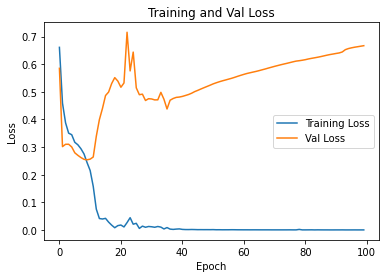

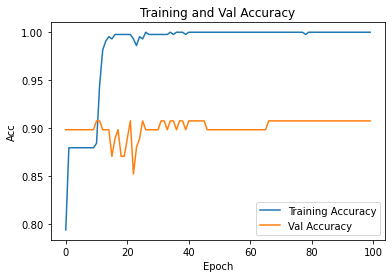

In [14]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Pelayanan']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dsa_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [15]:
model2.save('s_a_p.h5')